<a href="https://colab.research.google.com/github/i-rybachok/RybachokMachineLearning/blob/main/%D0%9C%D0%9D_%D0%9B%D0%B0%D0%B12_2_%D0%A0%D0%B8%D0%B1%D0%B0%D1%87%D0%BE%D0%BA_%D0%A4%D0%86%D0%A24_8_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рибачок Ірина, ФІТ 4-8. На парі була присутня

Лабораторна робота 2. Аналіз даних. Бібліотека Pandas

**Завдання 2**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fmahmoudshogaa%2Ftitanic-dataset

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mahmoudshogaa/titanic-dataset")

print("Path to dataset files:", path)


100%|██████████| 22.0k/22.0k [00:00<00:00, 19.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mahmoudshogaa/titanic-dataset/versions/1


Task 1-3

In [ ]:
df = pd.read_csv(os.path.join(path, "titanic.csv"))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId: Унікальний ідентифікатор для кожного пасажира.
Survived: У цьому стовпці вказується, чи вижив пасажир (1), чи ні (0).
Pclass (Клас квитка): Показник соціально-економічного статусу, де 1 – найвищий клас, а 3 – найнижчий.
Name: Ім'я пасажира.
Sex: Стать пасажира.
Age: Вік пасажира. (Примітка: У цьому стовпці можуть бути відсутні значення.)
SibSp: Кількість братів і сестер або подружжя пасажира на борту «Титаніка».
Parch: Кількість батьків або дітей пасажира на борту «Титаніка».
Ticket: Номер квитка.
Fare: Сума грошей, яку пасажир сплатив за квиток.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Task 4

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Task 5

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median(skipna=True))

df.drop(['Cabin'], axis=1, inplace=True) # вирішили видалити колонку

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Task 6

In [ ]:
# Clean the dataset of unnecessary columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Task 7

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
# Convert categorical data to numerical data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print(f'Data types of the dataset:\n{df.dtypes}')

Data types of the dataset:
Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object


Task 8

In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,32.204208
std,0.486592,0.836071,0.477990,13.019697,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


Task 9

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


Task 10

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


Task 11

In [ ]:
df.tail()

,Survived,Pclass,Sex,Age,Fare
886,0,2,0,27.0,13.00
887,1,1,1,19.0,30.00
888,0,3,1,28.0,23.45
889,1,1,0,26.0,30.00
890,0,3,0,32.0,7.75


Task 12

In [ ]:
# Calculate share of survivors by sex
male_survival_rate = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 0].shape[0]
female_survival_rate = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 1].shape[0]

print(f'Share of survived males {male_survival_rate * 100:.2f}%')
print(f'Share of survived females {female_survival_rate * 100:.2f}%')

print(f'Correlation between sex and survival: {df["Sex"].corr(df["Survived"])}')

Share of survived males 18.89%
Share of survived females 74.20%
Correlation between sex and survival: 0.5433513806577555


Task 13

In [ ]:
class1_surv_rate = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 1].shape[0]
class2_surv_rate = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 2].shape[0]
class3_surv_rate = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 3].shape[0]

print(f'Share of survived class 1 passengers {class1_surv_rate * 100:.2f}%')
print(f'Share of survived class 2 passengers {class2_surv_rate * 100:.2f}%')
print(f'Share of survived class 3 passengers {class3_surv_rate * 100:.2f}%')

Share of survived class 1 passengers 62.96%
Share of survived class 2 passengers 47.28%
Share of survived class 3 passengers 24.24%


Task 14

In [ ]:
survived_mean_age = df[df['Survived'] == 1]['Age'].mean()
not_survived_mean_age = df[df['Survived'] == 0]['Age'].mean()

print(f'Mean age of survived passengers: {survived_mean_age:.2f}')
print(f'Mean age of not survived passengers: {not_survived_mean_age:.2f}')

Mean age of survived passengers: 28.29
Mean age of not survived passengers: 30.03


Task 15

In [ ]:
# Separate dataset in 4 buckets by Fare sorted in ascending order
df['Fare_Category'] = pd.qcut(df['Fare'], 6, labels=False)

# Find share of survivors in each bucket
for i in range(6):
    surv_rate = df[(df['Fare_Category'] == i) & (df['Survived'] == 1)].shape[0] / df[df['Fare_Category'] == i].shape[0]
    print(f'Share of survived passengers in bucket {i}: {surv_rate * 100:.2f}%')

Share of survived passengers in bucket 0: 20.51%
Share of survived passengers in bucket 1: 19.08%
Share of survived passengers in bucket 2: 36.69%
Share of survived passengers in bucket 3: 43.62%
Share of survived passengers in bucket 4: 41.78%
Share of survived passengers in bucket 5: 69.80%


Task 16

In [ ]:
# Find median fare for the class
for i in range(1, 4):
    median_fare = df[df['Pclass'] == i]['Fare'].median()
    print(f'Median fare for class {i}: {median_fare:.2f}')

Median fare for class 1: 60.29
Median fare for class 2: 14.25
Median fare for class 3: 8.05


Task 17

<Axes: xlabel='Age', ylabel='Count'>

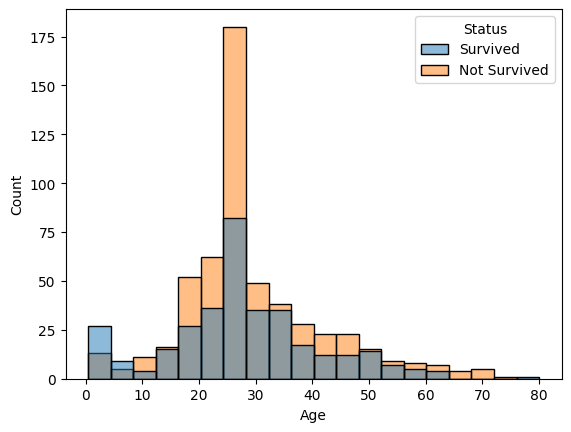

In [ ]:
# Combine the data into a single DataFrame
df_survived = df[df['Survived'] == 1][['Age']]
df_survived['Status'] = 'Survived'

df_not_survived = df[df['Survived'] == 0][['Age']]
df_not_survived['Status'] = 'Not Survived'

df_combined = pd.concat([df_survived, df_not_survived])

# Plot the histogram with hue
sns.histplot(data=df_combined, x='Age', hue='Status', bins=20)

In [ ]:
df.corr()

,Survived,Pclass,Sex,Age,Fare,Fare_Category
Survived,1.000000,-0.338481,0.543351,-0.064910,0.257307,0.325626
Pclass,-0.338481,1.000000,-0.131900,-0.339898,-0.549500,-0.695615
Sex,0.543351,-0.131900,1.000000,-0.081163,0.182333,0.248802
Age,-0.064910,-0.339898,-0.081163,1.000000,0.096688,0.109799
Fare,0.257307,-0.549500,0.182333,0.096688,1.000000,0.607440
Fare_Category,0.325626,-0.695615,0.248802,0.109799,0.607440,1.000000
